# CLASSIFICATION DU CANCER DU SEIN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns


In [2]:
sns.set(font_scale=1.3 , rc={'figure.figsize':(16,8)})

In [3]:
cancer = load_breast_cancer()

## description de l'ensemble de données


Prédire si le diagnostic de cancer est bénin ou malin sur la base de plusieurs observations / caractéristiques
- 30 fonctionnalités sont utilisées, exemples:
          -radius (moyenne des distances du centre aux points du périmètre)
          -texture (écart type des valeurs d'échelle de gris)
          -périmètre
          -surface
          -la finesse (variation locale de la longueur du rayon)
          -compactness (périmètre ^ 2 / surface - 1,0)
          -concavité (gravité des parties concaves du contour)
          points concaves (nombre de parties concaves du contour)
          -symétrie
          - dimension fractale ("approximation du trait de côte" - 1)

Les jeux de données sont séparables linéairement à l'aide des 30 entités en entrée
Nombre d'instances: 569
Répartition de la classe: 212 malignes, 357 bénignes
Classe cible: 
      Malignes , Bénigne



In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

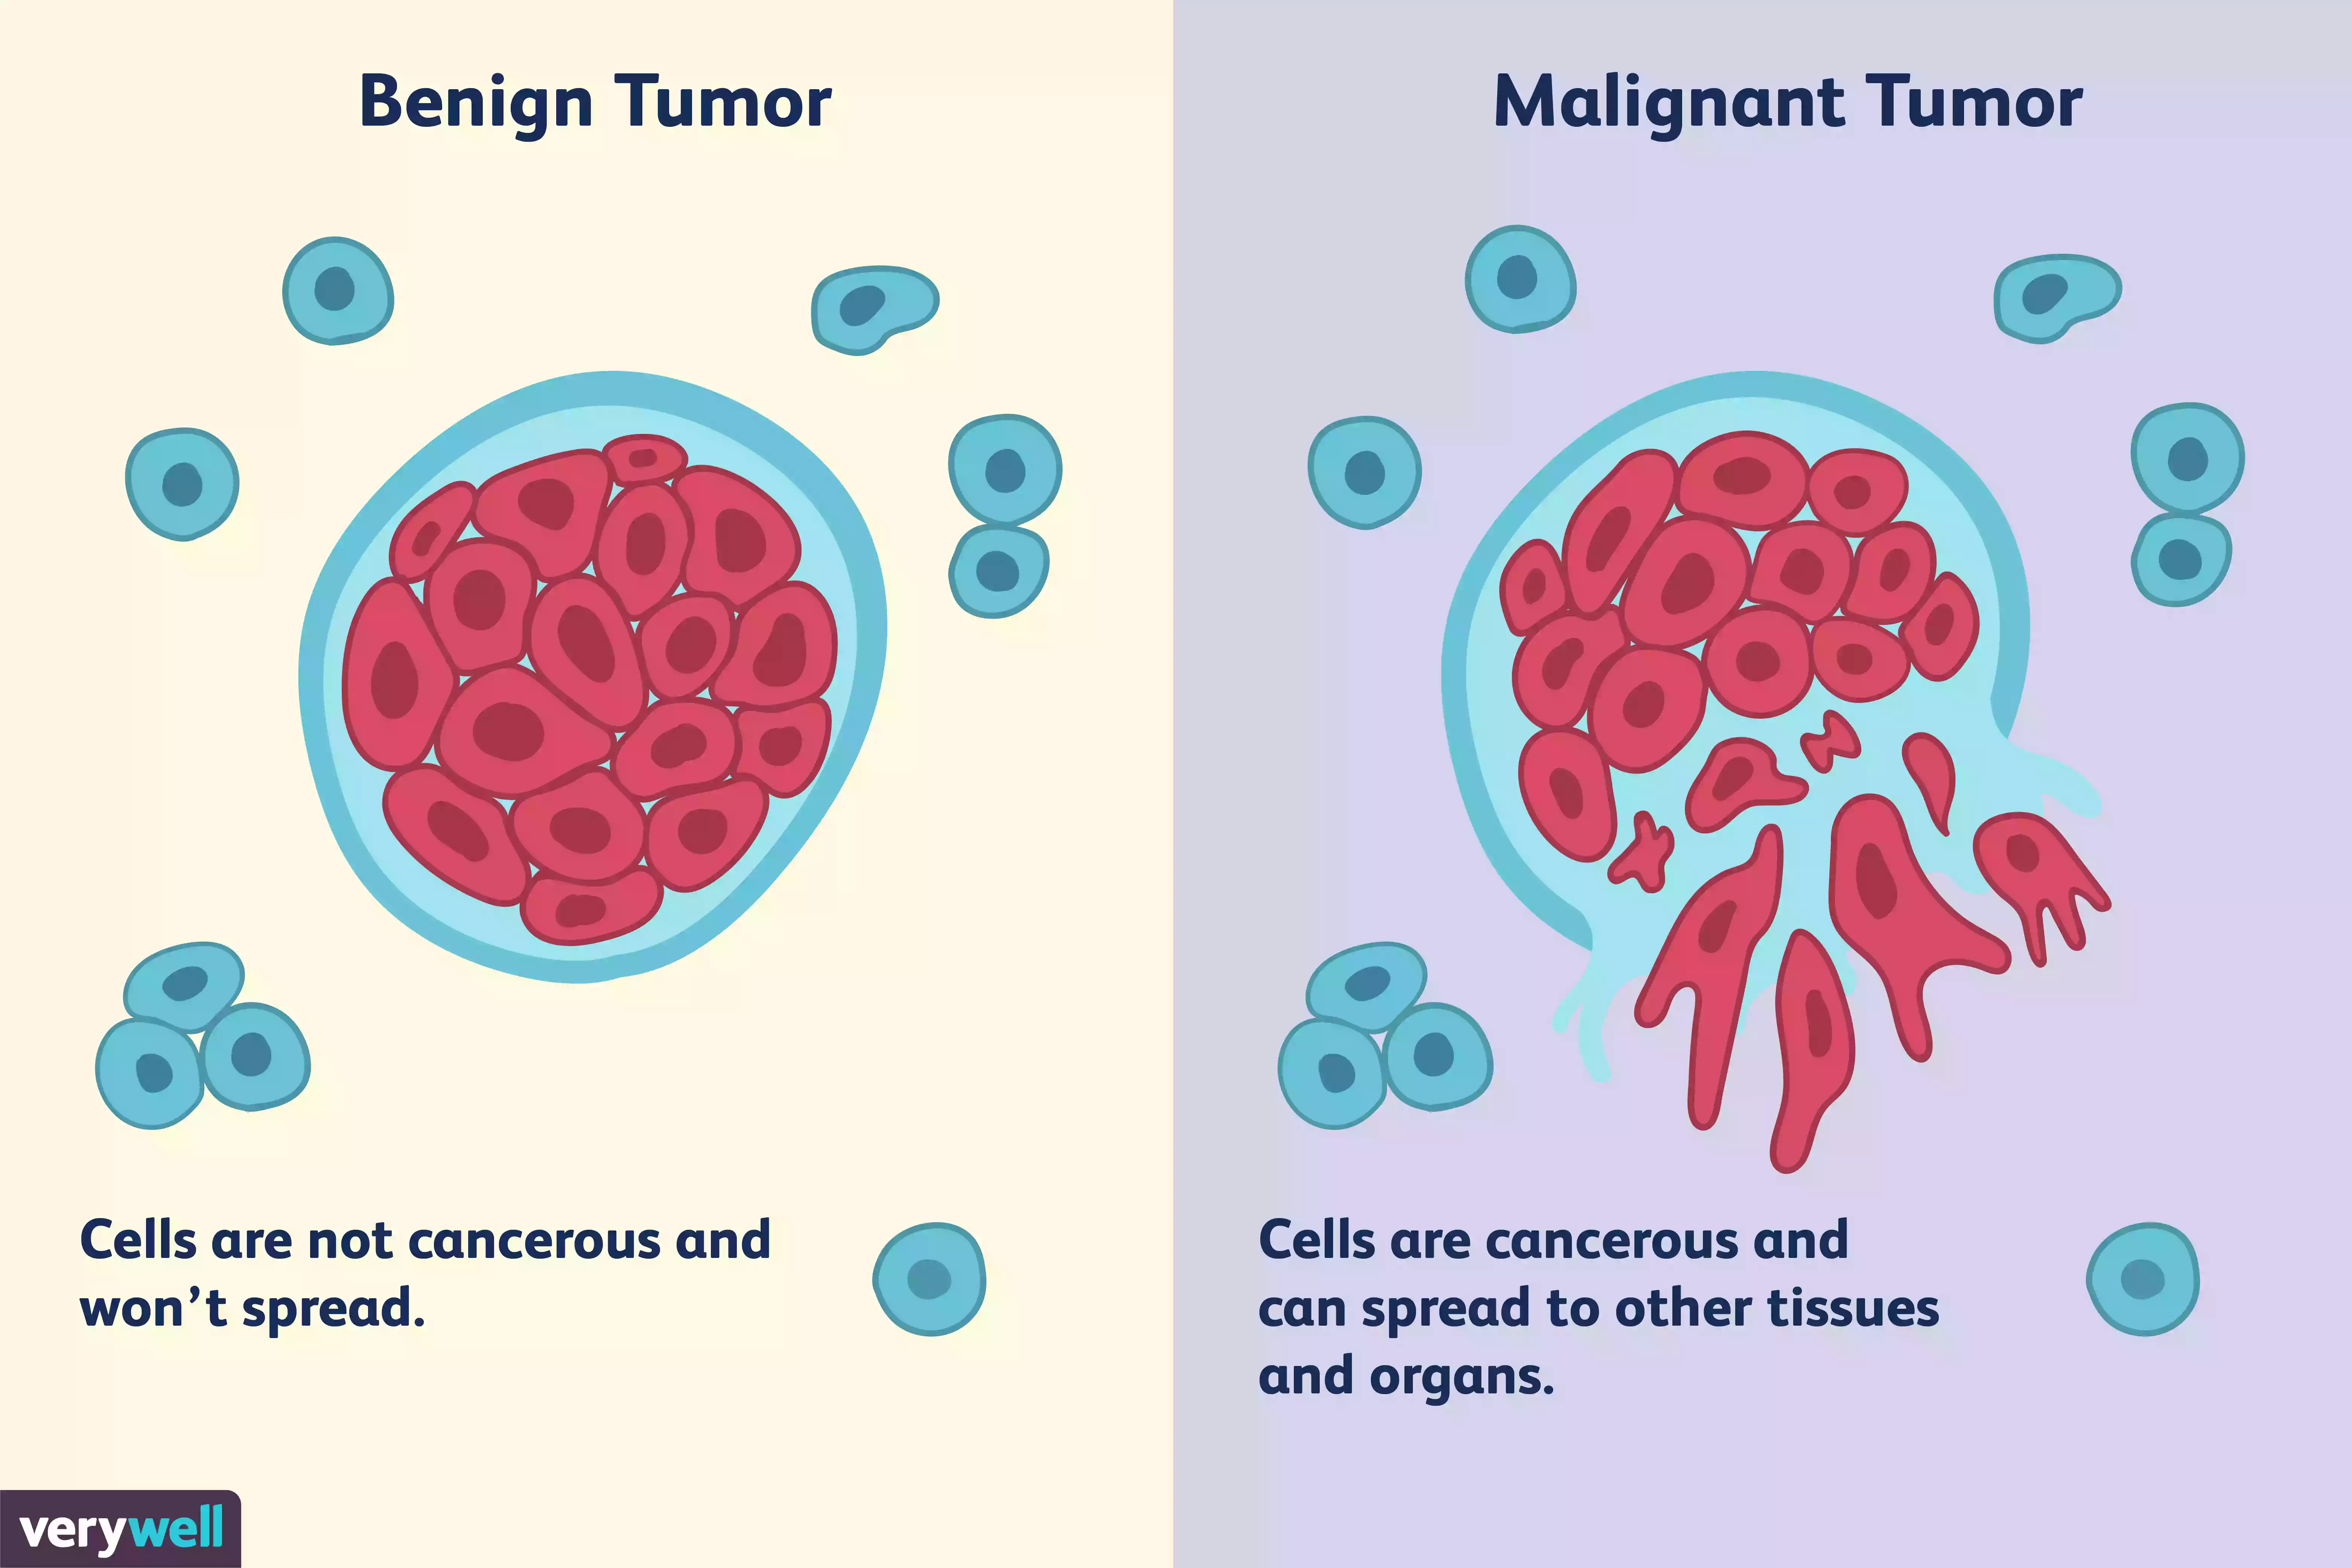

In [5]:
from IPython.core.display import Image, display
display(Image('dif.png'))

In [6]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [7]:
df_cancer['target'] = df_cancer['target'].map({0:1 , 1:0})

## Tableau de données

In [8]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [9]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


# VISUALISATION DES DONNÉES
   Bleu pour Bénigne = 0, rouge pour Malignes (cancer) = 1

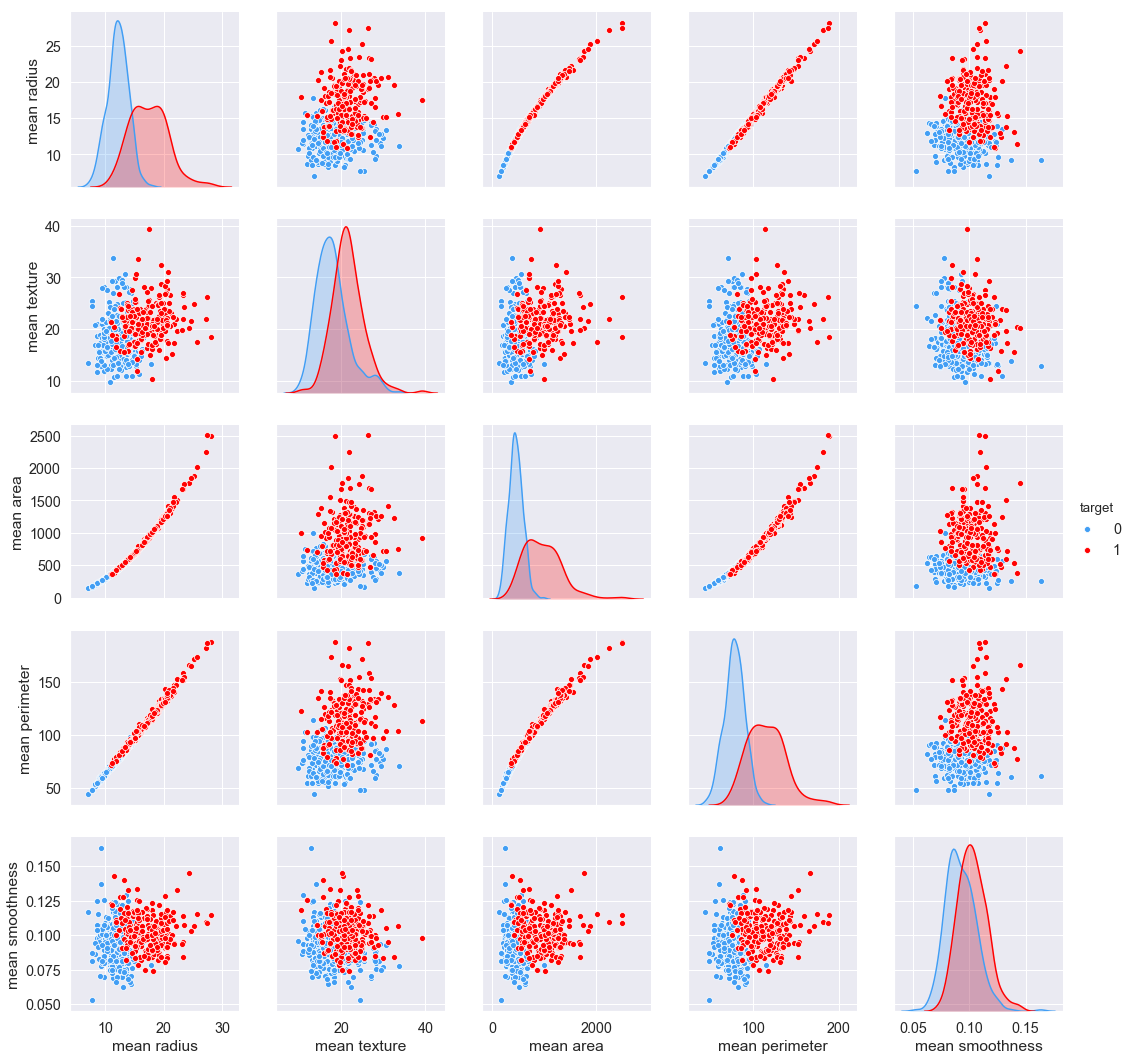

In [10]:
sns.pairplot(df_cancer , hue='target' , palette=["#429ef4", "#ff0202"], height=3 , aspect=1 ,
             vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [11]:
df_cancer['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

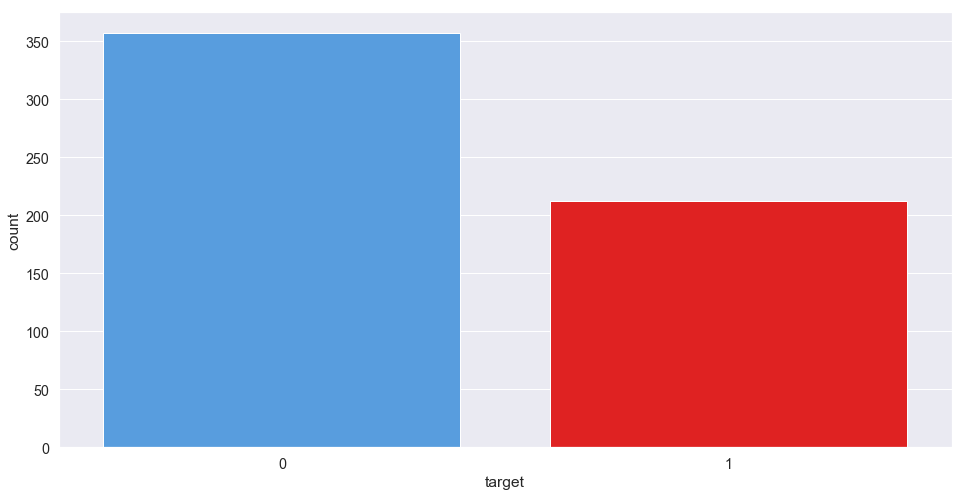

In [12]:
sns.countplot(df_cancer['target'] ,palette=["#429ef4", "#ff0202"] )

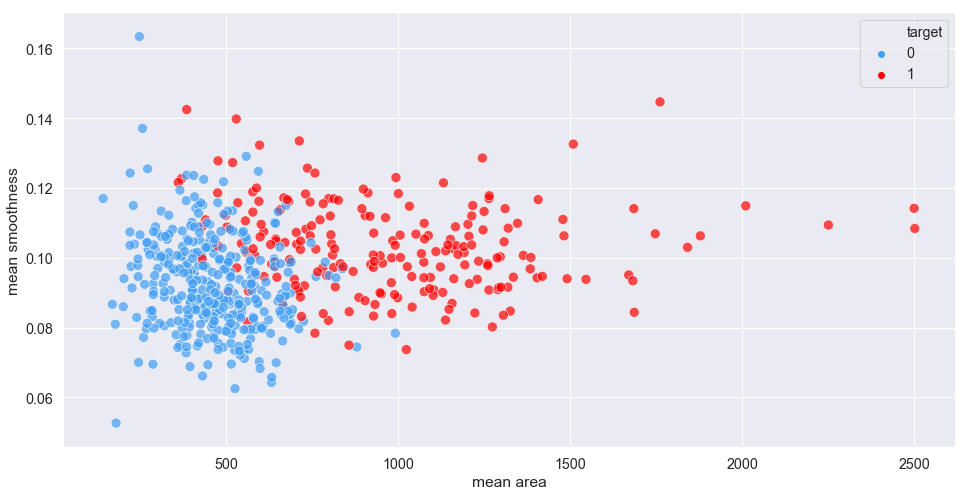

In [13]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer  ,
                palette=["#429ef4", "#ff0202"] , s=100 , alpha=0.7)


## Corrélation entre chaque caractéristique

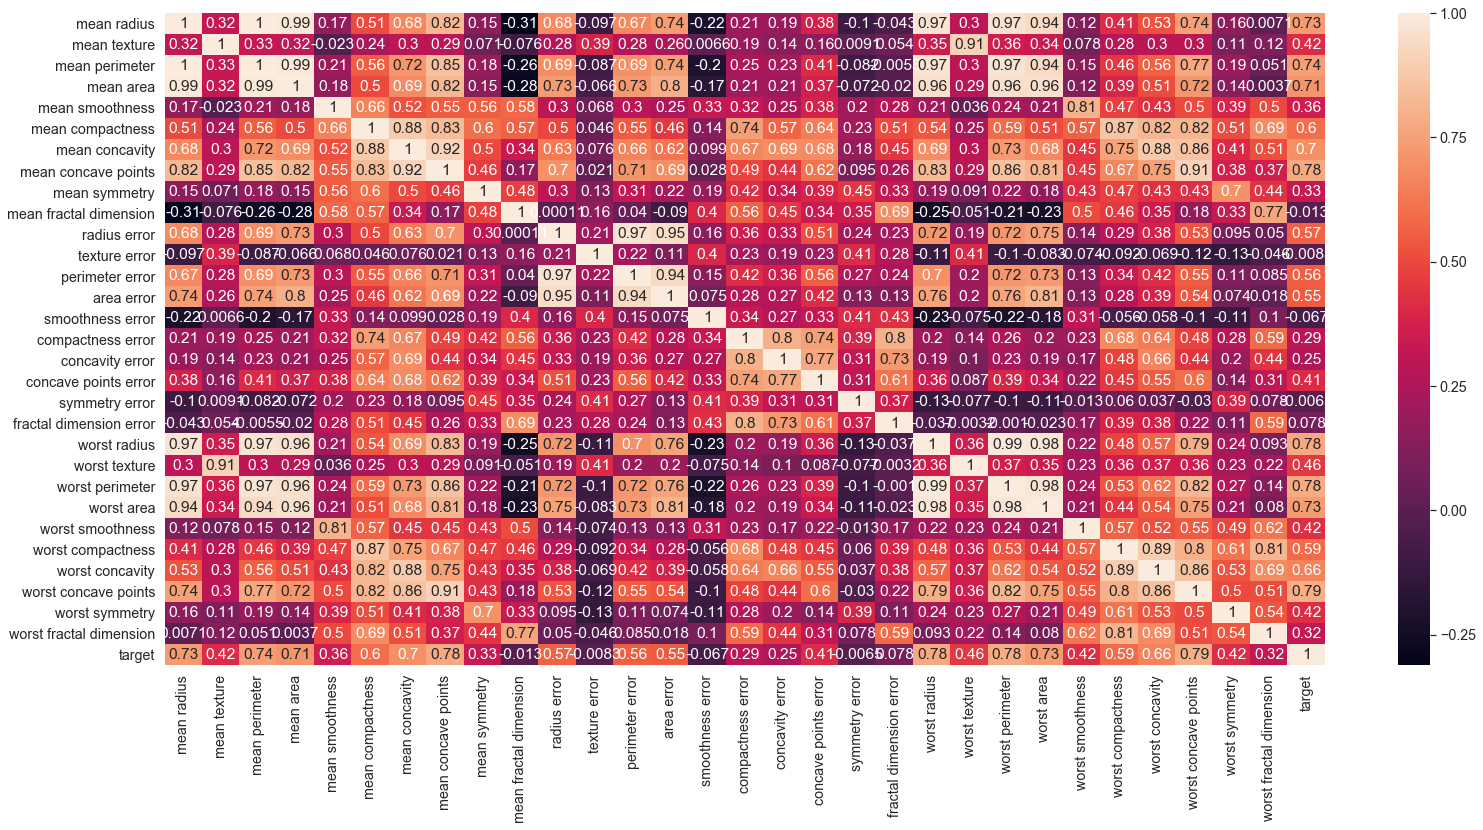

In [14]:
plt.figure(figsize=(26,12))
sns.heatmap(df_cancer.corr() , annot=True ,  )

# FORMATION DU MODÈLE

In [15]:
from sklearn.model_selection import train_test_split
X = df_cancer.drop('target' , 1)
y = df_cancer['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train , y_train)

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# EVALUER LE MODELE

In [18]:
from sklearn.metrics import classification_report , confusion_matrix

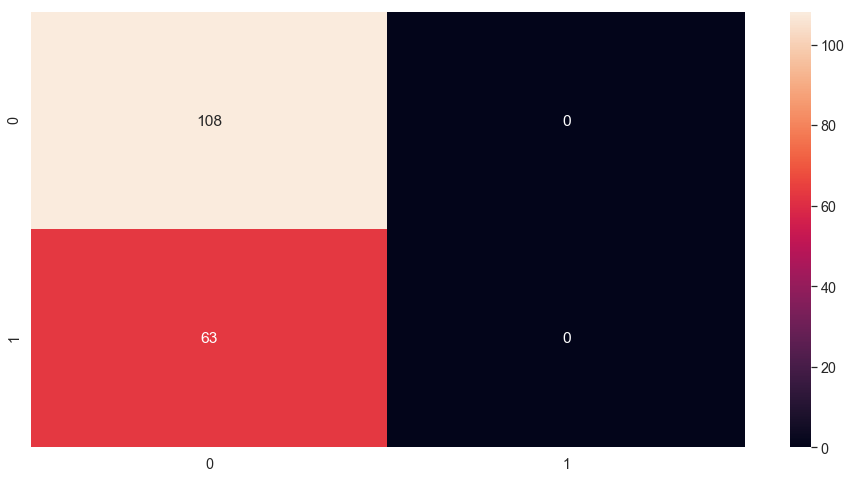

In [19]:
pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test , pred)
sns.heatmap(cm , annot=True , fmt='g')

In [20]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

   micro avg       0.63      0.63      0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AMELIORATION DU MODELE: Normalisation

In [21]:
Xmin = X.min()
Xmax = X.max()
nX = (X - Xmin) / (Xmax - Xmin)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X)

In [22]:
#nX  = scaler.transform(X)

## voici à quoi ressembleront les données après normalisation

## données original

## données normaliser 

In [23]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
nX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


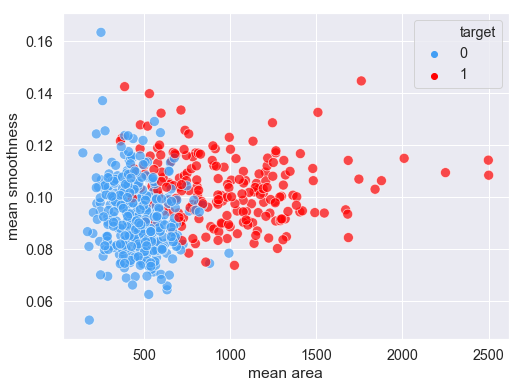

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer  ,
                palette=["#429ef4", "#ff0202"] , s=100 , alpha=0.7)

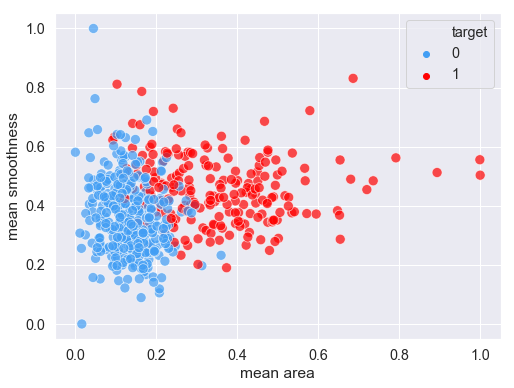

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = y, data = nX  ,
                palette=["#429ef4", "#ff0202"] , s=100 , alpha=0.7)

## Comme vous pouvez le constater sur le graph, même si les données normalisent la relation entre les caractéristiques, elles restent identiques. La normalisation n’affecte donc pas la relation entre les caractéristiques, mais notre modèle sera facile à apprendre à classer une cellule cancéreuse.

# former et évaluer notre modèle avec des données normalisées

In [27]:
X_train, X_test, y_train, y_test = train_test_split(nX, y, test_size=0.2, random_state=101)

In [28]:
n_svc = SVC().fit(X_train , y_train)

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


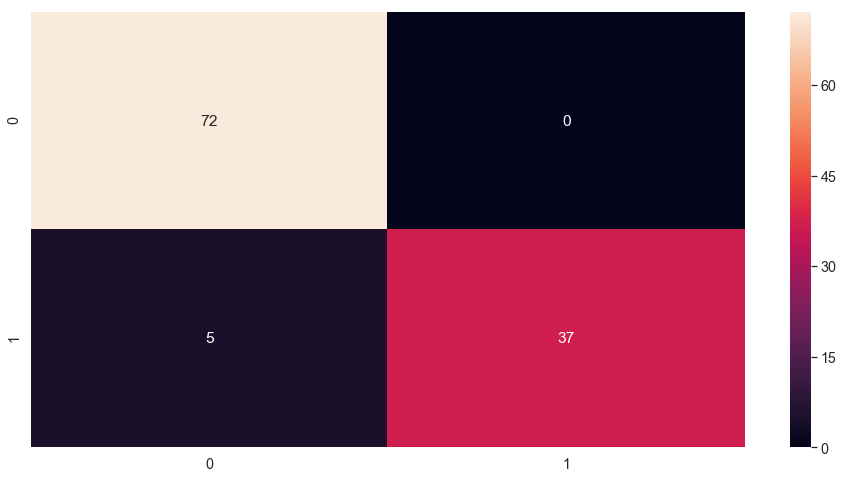

In [29]:
nypred = n_svc.predict(X_test)
ncm = confusion_matrix(y_test , nypred)
sns.heatmap(ncm , annot=True , fmt='g')

In [30]:
print(classification_report(y_test , nypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## beaucoup mieux que le premier, le modèle prédit un 5 Benign (0) mais en réalité il y avait un Malignes (1), ceci est une erreur de type 2 et c'est une mauvaise chose, il prédit que le patient n'a pas le cancer mais la réalité elle en a un

# AMÉLIORATION DU MODÈLE - PARTIE 2: Paramètres C et Gamma

In [31]:
parametre = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid = GridSearchCV(SVC(probability=True), parametre , refit=True,verbose=4)

In [34]:
grid.fit(X_train , y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9276315789473685, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9539473684210527, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9735099337748344, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.868421052631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8947368421052632, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8874172185430463, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6291390728476821, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [35]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
g_pred = grid.predict(X_test)

# évaluation du modèle après l'ajout des paramètres c et gamma

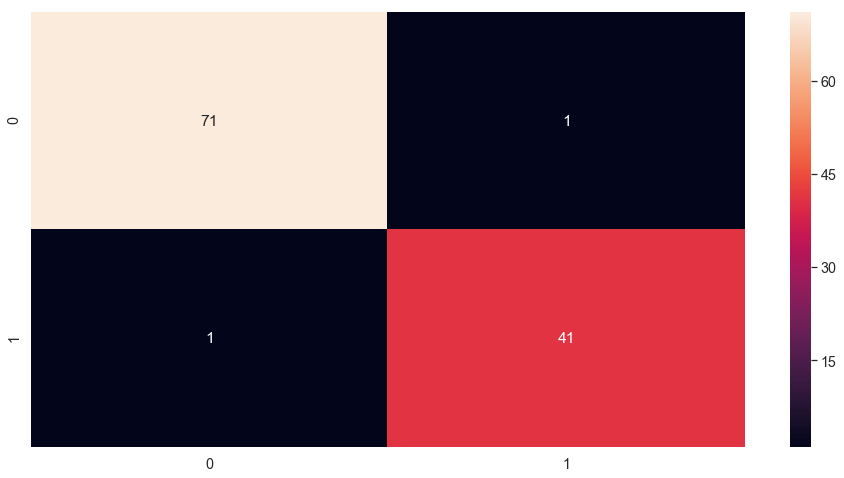

In [38]:
gcm = confusion_matrix(y_test , g_pred)
sns.heatmap(gcm , annot=True , fmt='g')

In [39]:
print(classification_report(y_test , g_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## voici la caractéristique la plus importante de la cellule pour détecter si elle est bénigne ou maligne

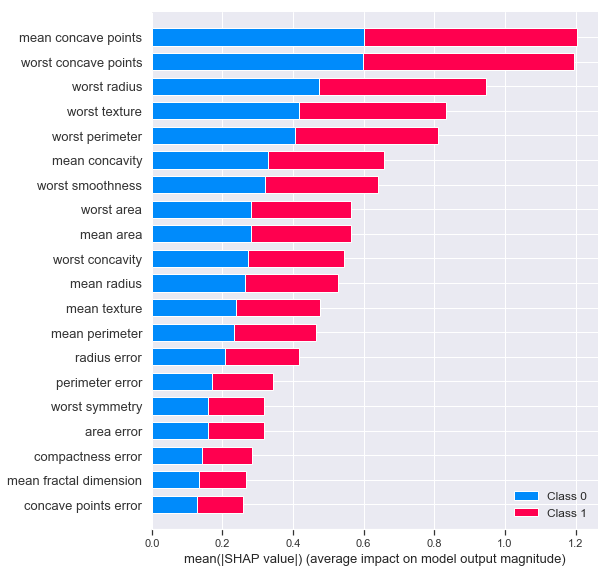

In [41]:
shap.summary_plot(shap_values, X_test )

## nous pouvons expliquer pourquoi un patient peut avoir un cancer ou non avec un karnel expliquer
dans cet exemple, cette patiente a 73% de chances que la tumeur soit maligne, les blocs rouges sont les caractéristiques indiquant que la tumeur est maligne et les bleus sont l'inverse , il se peut que nous ayons des problèmes de lecture parce que chacune des valeurs caractéristiques est ici sous forme normalisée , mais si vous êtes Docteur, vous avez bien des données non normalisées à vérifier, l’important est le résultat de la classification et les caractéristiques importantes pour chaque prédiction.

In [42]:
shap.initjs()
i = 61
shap.force_plot(explainer.expected_value[0], shap_values[1][i], X_test.iloc[i], link="logit")


## et ce graphique montre plusieurs résultats de patients 

In [44]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test, link="logit")

In [52]:
shap.initjs()
if grid.predict(newx) == 0:
    v = "Bénigne"
else:
    v = 'Malignes'
print(v)

shap.force_plot(explainer.expected_value[0], shap_values[1], newx, link="logit")


Bénigne
